In [5]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [6]:
# switch to decimal format in pandas, easier to read numbers
pd.set_option('display.float_format', lambda x: '%.1f' % x)


In [7]:
# load the housing data
df = pd.read_csv("Housing.csv")

In [8]:
# get common statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.2,5150.5,3.0,1.3,1.8,0.7
std,1870439.6,2170.1,0.7,0.5,0.9,0.9
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


In [9]:
# we can see that many of the variables are not numbers
# we have yes/no -categories and one category with three options (furnishingstatus)
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [10]:
# quick check do we have duplicates, not this time
df.duplicated().sum()

0

In [11]:
# quick check do we have missing values in any column, no missing values this time
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<b>If you have a group of binary category variables (yes/no etc.), use LabelEncoder to transform all of them at once into 0s and 1s.</b>

In [12]:
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


<b>Let's fix the furnishing status, which has 3 options -> we need OneHotEncoder</b>

In [14]:
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [16]:
# see the materials on this trick, we can remove the last new column for unfurnished
# since if the house is unfurnished, both furnished and semi-furnished will be 0
df = df.drop("furnishingstatus_unfurnished", axis=1)

In [17]:
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0,0


In [18]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished'],
      dtype='object')

In [19]:
# if you have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished']]

# have only the target variable here (dependent variable)
y = df['price']

In [20]:
# a nice trick to get all 6 variables for our neural network
# first split 70% for training data, and save the last 30% for temporary variables
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# then split again the temporary variables by 50% (so if it was 30% originally => now it's
# 15%/15% (because 30% * 50% = 15%))

# so after this, we have 70% for training, 15% testing, and 15% validation
# => 100% in total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [21]:
# 13 variables in this case for training
training_variable_amount = len(X.columns)

# NOTE! This neural network was copied from first example,
# PROBABLY NOT A GOOD SOLUTION FOR THIS DATA

# create the structure of our neural network
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(training_variable_amount,)),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

# compile the neural network, use adam (most common one) as the optimizer
# and mean square error (mse) for the loss function (most common for regression problems)
model.compile(optimizer='adam', loss='mse')

# show a quick recap of our structure
model.summary()

# start training 
model.fit(x=X_train, y=y_train, epochs=1500, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1500

12/12 [==============================] - 1s 16ms/step - loss: 25901112754176.0000 - val_loss: 25233182425088.0000
Epoch 2/1500
12/12 [==============================] - 0s 4ms/step - loss: 25900282281984.0000 - val_loss: 25232303718400.0000
Epoch 3/1500
12/12 [===============

<Axes: >

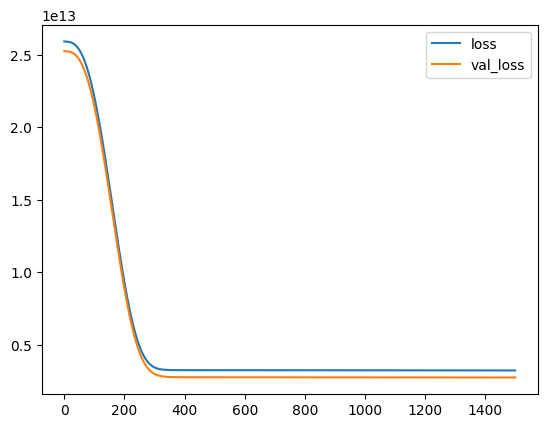

In [22]:
# let's see if our models overfits
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()